## Linear Models for Regression & Classification

<hr>

### Indice
1. Regresión lineal simple usando mínimos cuadrados ordinarios
2. Algoritmo de descenso de gradiente
3. Métodos de regresión regularizados: Ridge, Lasso, ElasticNet


<hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Regresión lineal simple usando mínimos cuadrados ordinarios

* La función consta de p variables independientes (p-dim)
* La variable objetivo/dependiente está representada por y
* La relación entre función y objetivo se representa mediante la siguiente ecuación
* Los w representan pesos o coeficientes para cada característica, w0 es el intercepto

$$
ŷ(w, x)= w_{0}+w_{1}x_{1}+...+w_{p}x_{p}
$$

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

* Residual Squared Sum (RSS) of Error - Suma del cuadrado de la diferencia entre el valor real y el valor predicho

<img src="lm2.png" style='height:350px' >

## 2. Gradient Descent

* LinearRegression tries to minimize RSS using <a href="https://www.kdnuggets.com/2017/04/simple-understand-gradient-descent-algorithm.html">Gradient Descent</a>. 
* The objective of Gradient Descent is the obtain best weights such that RSS is minimal.

<img src="gd.png" style='height:350px' >

# Transformación de características

### Comprender las matemáticas detrás del descenso de gradiente con notación simplificada
* Prediction, $y_p = Ax+B$
* Actual, y
* Simplified Loss for caclulation, Loss = $1/2 *\sum(y_p - y)^2$
* Algorithm 
  - Inicializar aleatoriamente los pesos A y B
   - Calcule el gradiente, es decir, el cambio en la pérdida cuando se cambian A y B.
   - Cambie los pesos por gradientes calculados y reduzca la pérdida
   - Repita todo el proceso hasta que los pesos no se reduzcan significativamente más

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

#### Generación de conjunto de datos de regresión
* n_features - número de características a considerar
* noise(ruido)  - desviación de la línea recta
* n_samples - número de muestras

In [3]:
from sklearn.datasets import make_regression
X,Y = make_regression(n_features=1, noise=10, n_samples=1000)

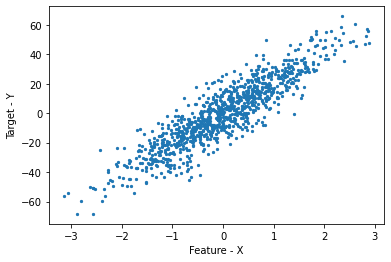

In [4]:
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.scatter(X,Y,s=5)

* Los hiperparámetros son la configuración inicial de los modelos
* Inicializar el modelo de regresión lineal con hiperparámetros predeterminados

In [9]:
lr = LinearRegression()

#### Hiperparámetros comunes
* fit_interceprt: si calcular la intersección para el modelo, no es necesario si los datos están centrados
* normalizar - X se normalizará restando la media y dividiendo por la desviación estándar

* <b>PD: al estandarizar los datos antes de someterlos al modelo, los coeficientes indican la importancia de las características</b>

#### Atributos comunes
* coef - pesos para cada variable independiente
* intersección - sesgo del término independiente de modelos lineales

#### Funciones comunes
* ajuste - entrena el modelo. Toma X e Y
* predecir: una vez que se entrena el modelo, para X dado usando la función de predicción, se puede predecir Y

#### Objetivo múltiple
* Y puede ser de más de 1 dimensión
* Las ventajas de varios objetivos son
   - computacionalmente rápido
   - el modelo está optimizado para múltiples objetivos
   - el modelo no utiliza la relación entre objetivos
   - el modelo es más interpretable
  
<hr/>

### Modelo de entrenamiento
* X debe estar en filas de formato de datos, X.ndim == 2
* Y debe ser 1D para un solo objetivo y 2D para más de un objetivo
* función de ajuste para entrenar el modelo

In [10]:
lr.fit(X,Y)

LinearRegression()

In [11]:
lr.coef_

array([20.31419191])

In [12]:
lr.intercept_

0.1198029716871733

### Predicción usando modelo entrenado

In [13]:
pred = lr.predict(X)

* Los puntos azules representan mapas de datos objetivo reales
* Los puntos naranjas representan datos predichos

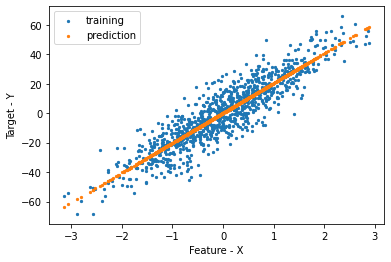

In [14]:
plt.scatter(X,Y,s=5, label='training')
plt.scatter(X,pred,s=5, label='prediction')
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.legend()
plt.show()

#### Limitación de la técnica de mínimos cuadrados ordinarios
* Impactado por valores atípicos
* No linealidades
* Demasiadas variables independientes
* Multicolinealidad
* Heterocedasticidad
* Ruido en las Variables Independientes

## 3. Métodos de regresión regularizados


### Regresión de cresta
* Ridge Regression impone una penalización sobre el tamaño del coef.
* Menos afectado por valores atípicos.

#### Adición de valores atípicos a los datos

In [15]:
ridge = Ridge(alpha=.1)
lr = LinearRegression()
ridge.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])
lr.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])

LinearRegression()

In [16]:
ridge.coef_

array([0.44186047, 0.44186047])

In [17]:
lr.coef_

array([-1.47086948e+14,  1.47086948e+14])

In [18]:
outliers = Y[950:] - 600

In [19]:
import numpy as np
Y_Out = np.append(Y[:950],outliers)

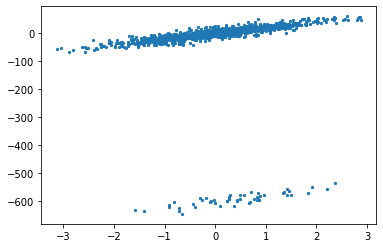

In [20]:
plt.scatter(X,Y_Out,s=5)

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(X,Y_Out)

LinearRegression()

In [23]:
pred_Out = lr.predict(X)

Text(0.5, 1.0, 'Linear Regression')

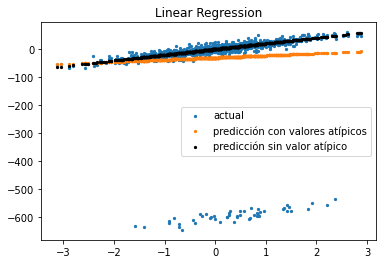

In [24]:
plt.scatter(X,Y_Out,s=5,label='actual')
plt.scatter(X,pred_Out,s=5,label='predicción con valores atípicos')
plt.scatter(X,pred,s=5,c='k', label='predicción sin valor atípico')
plt.legend()
plt.title('Linear Regression')

In [25]:
lr.coef_

array([7.65589346])

In [26]:
from sklearn.linear_model import Ridge

In [27]:
ridge = Ridge(alpha=1000)

In [28]:
ridge.fit(X,Y_Out)

Ridge(alpha=1000)

In [29]:
pred_ridge = ridge.predict(X)

Text(0.5, 1.0, 'Linear Regression')

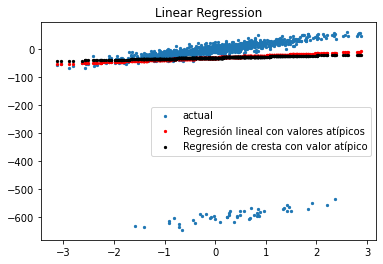

In [30]:
plt.scatter(X,Y_Out,s=5,label='actual')
plt.scatter(X,pred_Out,s=5, c='r' ,label='Regresión lineal con valores atípicos')
plt.scatter(X,pred_ridge,s=5,c='k', label='Regresión de cresta con valor atípico')
plt.legend()
plt.title('Linear Regression')

In [31]:
ridge.coef_

array([3.85426849])

### Efectos de alfa usando Ridge en Coeficientes
* Generación de datos

In [32]:
X, y, w = make_regression(n_samples=10, n_features=10, coef=True,
                          random_state=1, bias=3.5)

In [33]:
w

array([80.71051956, 10.74941291, 38.78606441, 13.64552257,  5.99176895,
       86.35418546, 12.13434557,  4.45518785, 74.71216427, 55.6240234 ])

### Training Ridge para diferentes valores de alfa
* Los coeficientes calculados se adjuntan a una lista
* Generar 20 alfas de 10^-6 a 10^6

In [34]:
alphas = np.logspace(-6, 6, 200)
alphas[:20]

array([1.00000000e-06, 1.14895100e-06, 1.32008840e-06, 1.51671689e-06,
       1.74263339e-06, 2.00220037e-06, 2.30043012e-06, 2.64308149e-06,
       3.03677112e-06, 3.48910121e-06, 4.00880633e-06, 4.60592204e-06,
       5.29197874e-06, 6.08022426e-06, 6.98587975e-06, 8.02643352e-06,
       9.22197882e-06, 1.05956018e-05, 1.21738273e-05, 1.39871310e-05])

In [35]:
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

#### Trazado de alfas y coeficientes
* Diferentes colores representan diferentes coefs

#### Conclusión
* A medida que alfa tiende a cero, los coeficientes encontrados por la regresión de Ridge se estabilizan hacia el vector w muestreado aleatoriamente (similar a la regresión lineal).
* Para alfa grande (regularización fuerte), los coeficientes son más pequeños (eventualmente convergen en 0), lo que lleva a una solución más simple y sesgada.

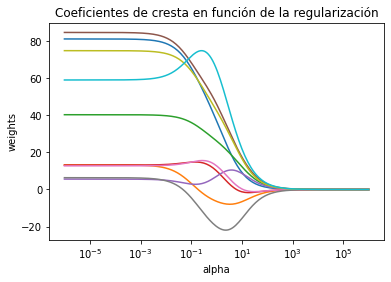

In [36]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Coeficientes de cresta en función de la regularización')
plt.show()

### Lasso
* Modelo lineal que predice coefs dispersos
* Reduce el objetivo de predicción de los regresores

In [37]:
lasso = Lasso(alpha=.1)
lasso.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])

Lasso(alpha=0.1)

In [38]:
lasso.coef_

array([0.5, 0. ])

### Elastic Net   

* Elastic-net es útil cuando hay múltiples funciones que están correlacionadas entre sí. Es probable que Lasso elija uno de estos al azar, mientras que elastic-net probablemente elija ambos.

In [39]:
en = ElasticNet(alpha=.1)

In [40]:
en.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])

ElasticNet(alpha=0.1)

In [41]:
en.coef_

array([0.32589556, 0.32579954])

![](img/questions-01.png)

# 1. Regresión lineal

### 1.1 Preguntas conceptuales
1. ¿Cuál es la diferencia entre objetivo y predicción? $
\cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot $ ($\star$)
2. ¿Cuál es la pérdida utilizada en el problema de regresión lineal estándar?  $\cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot$ ($\star$)
3. ¿Qué es la función objetivo en la regresión lineal? $\cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot$  ($\star \star \star$)
4. ¿Cuáles son los parámetros que se optimizan en la regresión lineal? $\cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot$  ($\star$)
5. ¿Qué es el vector de características en la regresión lineal? $\cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot$  ($\star$)
6. ¿Qué son los modelos lineales? ¿Son solo sobre líneas? $\cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot$ ($\star$)
